In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
noaa_data = pd.read_csv('222X.DAT', skiprows = 4,  names = pd.read_csv('222X.DAT', nrows = 1, skiprows = 1), low_memory=False)
mask = (noaa_data['TIMESTAMP'] > '2019-10-21 12:00') & (noaa_data['TIMESTAMP'] <= '2019-11-17 16:00')
noaa_data = noaa_data.loc[mask]
noaa_data['TIMESTAMP'] = noaa_data['TIMESTAMP'].apply(datetime.fromisoformat)
noaa_data.set_index('TIMESTAMP', inplace = True)
noaa_data.head()

,RECORD,site_id,calendar_day,AirTC_Avg,AirTC_Std,AirTC_Max,AirTC_Min,RH_Avg,RH_Max,RH_Min,...,Ozone,ozone_temp_Avg,future_1,future_2,future_3,Gamma_Avg,data_temp_Avg,Batt_Volt_Avg,Batt_Volt_Max,Batt_Volt_Min
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2019-10-21 12:00:00,156293,222,294,15.24,0.231,15.57,14.78,75.43,80.50,68.23,...,-99,-99,-99,-99,-99,-99,25.8,13.08,13.19,13.02
2019-10-21 12:15:00,156294,222,294,15.34,0.106,15.60,15.09,73.26,79.74,68.20,...,-99,-99,-99,-99,-99,-99,25.97,13.08,13.16,13.01
2019-10-21 12:30:00,156295,222,294,15.04,0.079,15.26,14.82,75.06,80.10,69.08,...,-99,-99,-99,-99,-99,-99,25.13,13.09,13.11,13.03
2019-10-21 12:45:00,156296,222,294,14.70,0.442,15.33,13.93,81.00,88.20,73.34,...,-99,-99,-99,-99,-99,-99,25.21,13.08,13.11,13.02
2019-10-21 13:00:00,156297,222,294,14.85,0.325,15.67,14.00,81.10,87.30,76.85,...,-99,-99,-99,-99,-99,-99,24.69,13.08,13.11,13.00


In [5]:
noaa_10min = noaa_data.resample('10min').mean()
noaa_10min.head()

,RECORD,site_id,calendar_day,AirTC_Avg,AirTC_Std,AirTC_Max,AirTC_Min,RH_Avg,RH_Max,RH_Min,...,Ozone_Max,Ozone_Min,Ozone,ozone_temp_Avg,future_1,future_2,future_3,Gamma_Avg,Batt_Volt_Max,Batt_Volt_Min
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2019-10-21 12:00:00,156293.0,222.0,294.0,15.24,0.231,15.57,14.78,75.43,80.50,68.23,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,13.19,13.02
2019-10-21 12:10:00,156294.0,222.0,294.0,15.34,0.106,15.60,15.09,73.26,79.74,68.20,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,13.16,13.01
2019-10-21 12:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-21 12:30:00,156295.0,222.0,294.0,15.04,0.079,15.26,14.82,75.06,80.10,69.08,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,13.11,13.03
2019-10-21 12:40:00,156296.0,222.0,294.0,14.70,0.442,15.33,13.93,81.00,88.20,73.34,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,13.11,13.02


In [6]:
noaa_data.to_csv('noaa_data_10minAvg.csv')

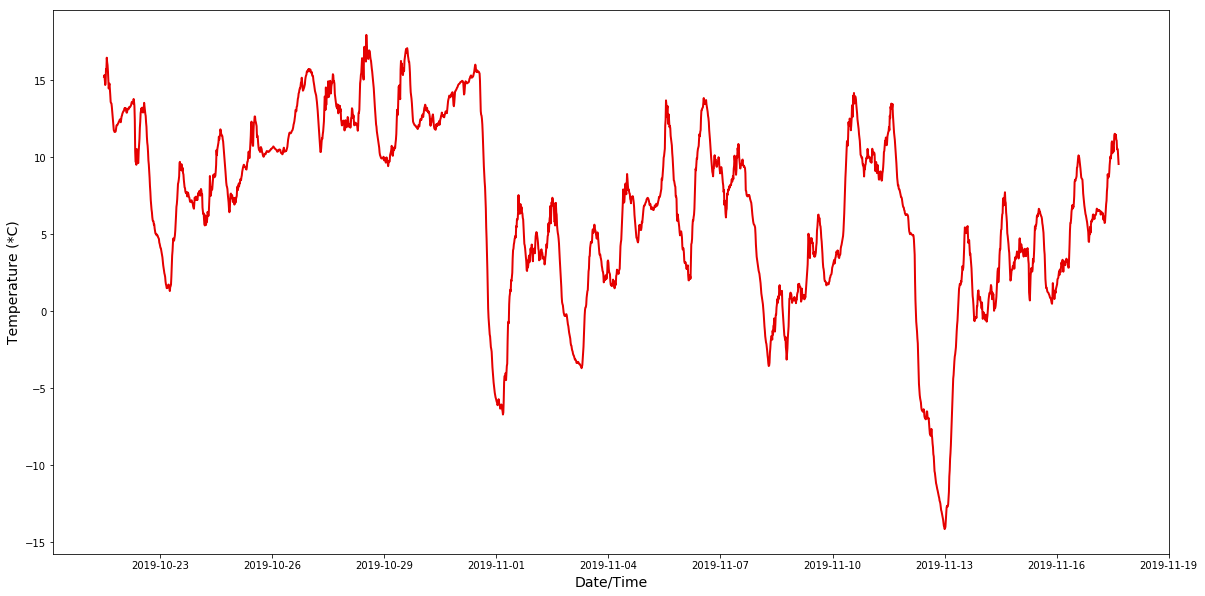

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(noaa_data['AirTC_Avg'], linewidth = 2, color = 'xkcd:red')
plt.xlabel('Date/Time', fontsize = 14)
plt.ylabel('Temperature (*C)', fontsize = 14)
plt.show()